# 1 - Perkenalan
> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

- Name : Efitri Apriliyan
- Batch : 015 - RMT
- Objective : Senitement Analysis for TripAdvisor Hotel Review

  Di era sekarang ini, banyak sekali penyedia jasa booking hotel secara online. Kita dapat dengan mudah memilih aplikasi mana yang akan kita gunakan. Hal ini juga diikuti dengan semakin banyaknya hotel, villa dan resort baru yang bermunculan dan seiring dengan meningkatnya kesadaran masyarakat untuk *healing* dan melakukan liburan.

  Trip Advisor adalah penyedia layanan untuk pemesanan hotel, villa dan resort secara online. Aplikasi ini menyediakan begitu banyak pilihan hotel dengan berbagai budget yang sesuai dengan kebutuhan pelanggan. Dengan banyaknya pilihan hotel dan fasilitasnya, terdapat berbagai macam review dari pelanggan yang melakukan reservasi online, baik dalam bentuk ulasan positif maupun negatif.

  Kali ini kita akan melihat analisis sentimen yang diberikan oleh pelanggan berdasarkan ulasan mereka melalui Trip Advisor. Kita juga akan membuat model untuk melihat bagaimana sentimen yang diberikan oleh pelanggan, dalam bentuk sentimen positif maupun negatif. Dataset yang kita gunakan adalah Trip Advisor Hotel Review dari https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews dengan 20.491 review dari pelanggan.

# 2 - Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd

# Exploratory Dataset

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Text Preprocessing

import re
from nltk.tokenize import word_tokenize
import nltk.stem as stemmer
from nltk.stem.porter import *

# Metrics and Validation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Embedding Layer

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, TextVectorization, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout, Dense

from urllib import request
from PIL import Image

In [ ]:
# Download Stopwords and Punkt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# 3 - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [ ]:
#load_data

df = pd.read_csv('h8dsft_Milestone2P2_Efitri_Apriliyan.csv')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
# Melihat data awal
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [ ]:
# Melihat data akhir
df.tail(10)

,Review,Rating
20481,ok price look hotel ok little run average clea...,2
20482,great choice wife chose best western quite bit...,5
20483,good bed clean convenient just night happy sta...,4
20484,deceptive staff deceptive desk staff claiming ...,2
20485,not impressed unfriendly staff checked asked h...,2
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [ ]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


Data terdiri dari 20.491 baris dan 2 kolom. Terlihat bahwa dataset tidak memiliki null data.

# 4 - Exploratory Data Analysis (EDA)
> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, word cloud, dan lain sebagainya.

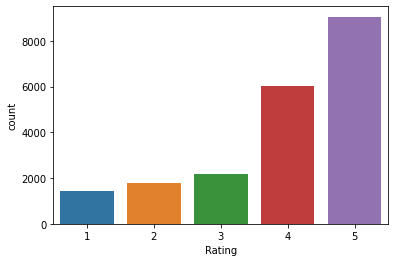

In [ ]:
# Histogram of Rating
sns.countplot(x="Rating", data=df)

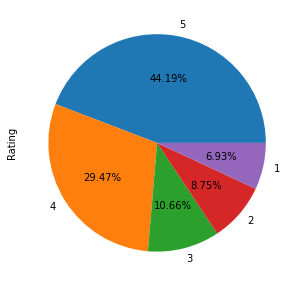

In [79]:
# Pie Chart of Rating

df['Rating'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

In [ ]:
#Rating Distribution
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

- Rating terbanyak yang diberikan pengunjung adalah 5 yaitu sebanyak 9.054 (44.19%) review dan Rating 4 sebanyak 6.039 (29.47%) review.
- Berdasarkan nilai Rating yang diberikan pengunjung, selanjutnya kita akan membagi rating menjadi sentiment analisis yang berupa positif dan negatif review.

In [ ]:
# Devide data into Positive and Negative Sentiment

positive = [4,5]
negative = [1,2,3]


In [ ]:
def sentiment (rating):
    if rating in positive:
        return 1
    elif rating in negative:
        return 0

In [ ]:
# Add Sentiment to Column
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


In [ ]:
# Sentiment Distribution
df.Sentiment.value_counts()

1    15093
0     5398
Name: Sentiment, dtype: int64

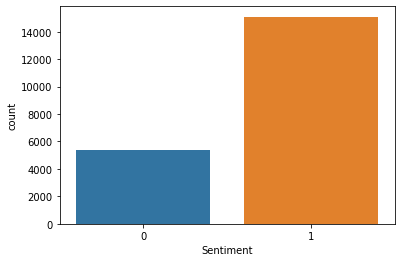

In [ ]:
# Histogram of Sentiment
# 1 = positive ; 0 = negative

sns.countplot(x="Sentiment", data=df)

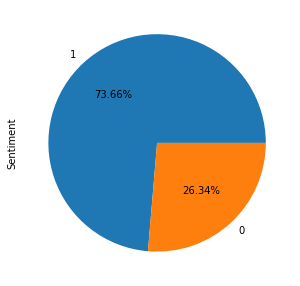

In [ ]:
# Pie Chart of Sentiment

df['Sentiment'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Data terlihat Imbalance. Jumlah sentimen positif lebih besar yaitu sebanyak 15.093 review (73.66%) dan sentimen negatif sebesar 5.398 (26.34%) review.

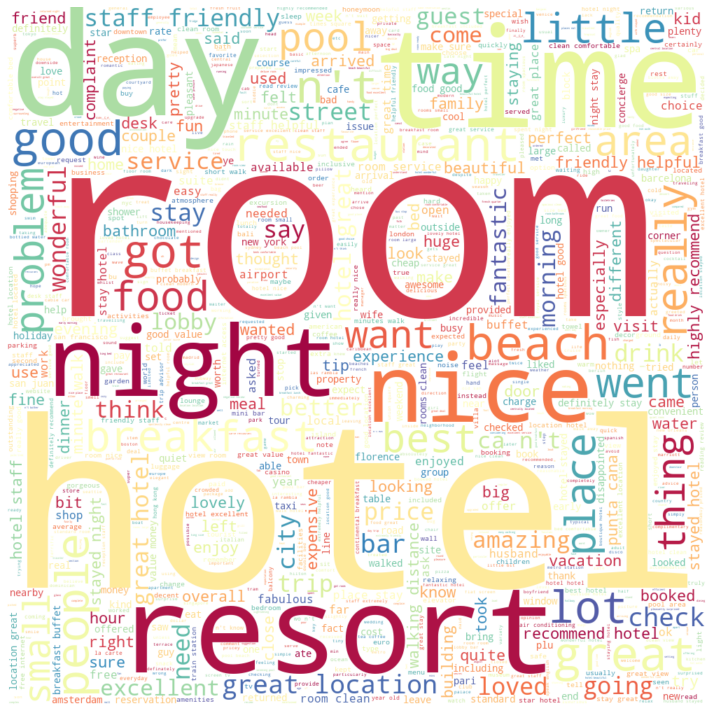

In [ ]:
# Wordcloud for Positive Review

df_like=df.loc[df['Sentiment']==1]
#===
Reviews_Text = " ".join(insul for insul in df_like.Review)

#== 
wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

- Kata yang sering muncul pada review postive adalah room, hotel, resort, nice, good, day, time, great, loved best, wonderful.

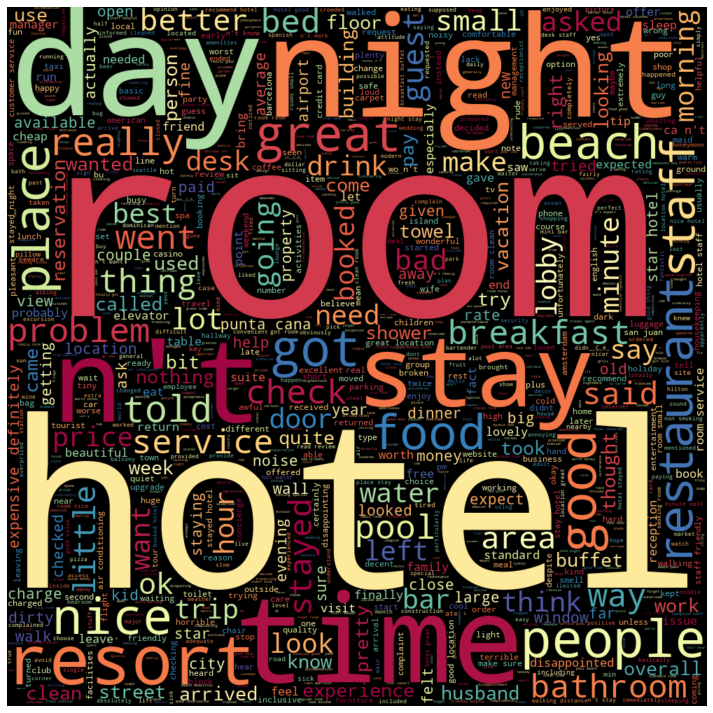

In [ ]:
# Wordcloud for Negative Review

df_dislike=df.loc[df['Sentiment']==0]
#===
Reviews_Text = " ".join(insul for insul in df_dislike.Review)

#== 
wc = WordCloud(background_color='black', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
wc.generate(Reviews_Text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

Kata yang sering muncul pada review negative adalah room, hotel, n't, day, night, stay, problem, time, small, food, got, place, need, bad, away.

# 5 - Data Preprocessing
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [ ]:
# Get Data for Model Inference

data_inf = df.sample(10, random_state=2) #2 angka random. 
data_inf

,Review,Rating,Sentiment
10271,"not family friendly hotel, travelled wife 2 yr...",1,0
7142,"did n't know expect honemoon surprise loved, r...",4,1
18500,"enthusiastically reccomend majestic colonial, ...",5,1
17145,"problems start beware hotel, choices resort pu...",1,0
2704,enjoyed second stay husband just returned seco...,5,1
16684,wonderful hotel trip stayed hotel europa just ...,5,1
17236,"fantastic resort want party loaded pick nuts, ...",4,1
5809,great location clean comfortable stayed july 0...,4,1
19040,"loved did n't use bug spray, loved resort, sui...",4,1
8840,"central hotel central, reception desk helpful,...",2,0


In [ ]:
# Remove Inference Set from Dataset
df_2 = df.drop(data_inf.index)
df_2

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,1
20487,great location price view hotel great quick pl...,4,1
20488,"ok just looks nice modern outside, desk staff ...",2,0
20489,hotel theft ruined vacation hotel opened sept ...,1,0


In [ ]:
# Reset Index

df_2.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Review,Rating,Sentiment
0,"not family friendly hotel, travelled wife 2 yr...",1,0
1,"did n't know expect honemoon surprise loved, r...",4,1
2,"enthusiastically reccomend majestic colonial, ...",5,1
3,"problems start beware hotel, choices resort pu...",1,0
4,enjoyed second stay husband just returned seco...,5,1
5,wonderful hotel trip stayed hotel europa just ...,5,1
6,"fantastic resort want party loaded pick nuts, ...",4,1
7,great location clean comfortable stayed july 0...,4,1
8,"loved did n't use bug spray, loved resort, sui...",4,1
9,"central hotel central, reception desk helpful,...",2,0


In [ ]:
df_2

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1
...,...,...,...
20476,"best kept secret 3rd time staying charm, not 5...",5,1
20477,great location price view hotel great quick pl...,4,1
20478,"ok just looks nice modern outside, desk staff ...",2,0
20479,hotel theft ruined vacation hotel opened sept ...,1,0


## Preprocessing All Documents

In [ ]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Tokenization
  tokens = word_tokenize(text)

  # 10. Removing Stopwords
  stopwords_en = list(set(stopwords.words('english')))
  text = ' '.join([word for word in tokens if word not in stopwords_en])
  
  # 11. Stemming
  stemmer = PorterStemmer()
  text = stemmer.stem(text)
  
  return text

In [ ]:
# Applying Preprocessing to all Documents

df_2['Review_processed'] = df_2['Review'].apply(lambda x: text_process(x))
df_2

,Review,Rating,Sentiment,Review_processed
0,nice hotel expensive parking got good deal sta...,4,1,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,0,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,0,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,1,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,1,great stay great stay went seahawk game awesom...
...,...,...,...,...
20476,"best kept secret 3rd time staying charm, not 5...",5,1,best kept secret rd time staying charm star ca...
20477,great location price view hotel great quick pl...,4,1,great location price view hotel great quick pl...
20478,"ok just looks nice modern outside, desk staff ...",2,0,ok looks nice modern outside desk staff n't pa...
20479,hotel theft ruined vacation hotel opened sept ...,1,0,hotel theft ruined vacation hotel opened sept ...


## Splitting between X (Corpus) and y (Target)

In [ ]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(df_2.Review_processed, 
                                                            df_2.Sentiment, 
                                                            test_size=0.15,
                                                            random_state=25,
                                                            stratify=df_2.Sentiment)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=25)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (14796,)
Val Size :  (2612,)
Test Size :  (3073,)


## Handling Missing Values

In [ ]:
# Check Missing Values on X_train

X_train.isnull().sum()

0

In [ ]:
# Check Missing Values on X_val

X_val.isnull().sum()

0

In [ ]:
# Check Missing Values on X_test

X_test.isnull().sum()

0

In [ ]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [ ]:
# Check Missing Values on y_val

y_val.isnull().sum()

0

In [ ]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

Tidak terdapat missing values pada data train, val dan test.

## Pipeline

In [ ]:
# Convert String into Numerical Vocabularies

count_vect = CountVectorizer()

X_train_vect = count_vect.fit_transform(X_train)
X_val_vect = count_vect.transform(X_val)
X_test_vect = count_vect.transform(X_test)
X_train_vect

<14796x41746 sparse matrix of type '<class 'numpy.int64'>'
	with 1177029 stored elements in Compressed Sparse Row format>

Dari corpus ini, terdapat 617.673.816 values (dari hasil 14.796 * 41.746) tetapi hanya 1.177.029 tokens yang non-zero values dengan 41.746 jumlah vocabularies.

In [ ]:
# Search for Total Vocab and Maximum Token in One Document

total_vocab = len(count_vect.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Total Vocab : ", total_vocab)
print("Maximum Sentence Length : ", max_sen_len, "word")

Total Vocab :  41746
Maximum Sentence Length :  1510 word


In [ ]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) 
                                       )

text_vectorization.adapt(X_train)

In [ ]:
# Melihat Top 20 Token (Diurutkan Berdasarkan Frekuensi Kemunculan Terbesar)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'hotel',
 'room',
 'great',
 'nt',
 'good',
 'staff',
 'stay',
 'nice',
 'rooms',
 'location',
 'stayed',
 'night',
 'service',
 'beach',
 'day',
 'time',
 'clean',
 'breakfast']

In [ ]:
# Embedding

embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [ ]:
#Pipeline for Tensorflow

# Tensor Pipeline Train Set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=150).batch(64)

# Tensor Pipeline Validation Set
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(64)

# Tensor Pipeline Test Set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(64)



# Sequential API Model Baseline

# 6.1 - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model/arsitektur, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [ ]:
# Model with Dense Layer 

#create Sequential API
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())

#hidden layer 1
model.add(Dense(32,activation='relu')) 

#output layer
model.add(Dense(1,activation='softmax')) 

#compiling
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1510)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1510, 128)         5343488   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,347,649
Trainable params: 5,347,649
Non-

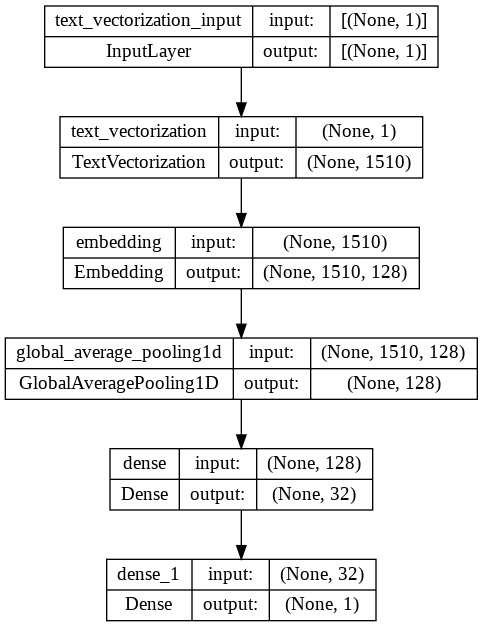

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model, show_shapes=True)

# 7.1 - Model Training
>Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [ ]:
# Train the Model
model_seq_1 = model.fit(train_dataset,
                         epochs=20,
                         validation_data = val_dataset)

Epoch 1/20
232/232 [==============================] - 28s 122ms/step - loss: 0.2044 - accuracy: 0.7396 - val_loss: 0.2746 - val_accuracy: 0.7194
Epoch 2/20
232/232 [==============================] - 29s 126ms/step - loss: 0.1653 - accuracy: 0.7396 - val_loss: 0.2718 - val_accuracy: 0.7194
Epoch 3/20
232/232 [==============================] - 27s 115ms/step - loss: 0.1503 - accuracy: 0.7396 - val_loss: 0.2804 - val_accuracy: 0.7194
Epoch 4/20
232/232 [==============================] - 27s 115ms/step - loss: 0.1391 - accuracy: 0.7396 - val_loss: 0.2876 - val_accuracy: 0.7194
Epoch 5/20
232/232 [==============================] - 26s 112ms/step - loss: 0.1304 - accuracy: 0.7396 - val_loss: 0.2961 - val_accuracy: 0.7194
Epoch 6/20
232/232 [==============================] - 28s 120ms/step - loss: 0.1195 - accuracy: 0.7396 - val_loss: 0.2925 - val_accuracy: 0.7194
Epoch 7/20
232/232 [==============================] - 27s 115ms/step - loss: 0.1112 - accuracy: 0.7396 - val_loss: 0.2975 - val_ac

# 8.1 - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

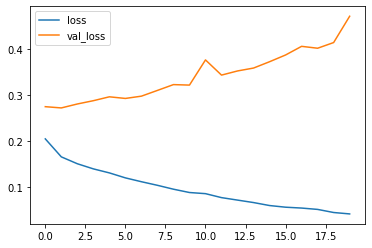

In [ ]:
# Plot between loss and val_loss

history_model_seq_1 = pd.DataFrame(model_seq_1.history)
history_model_seq_1[['loss', 'val_loss']].plot()

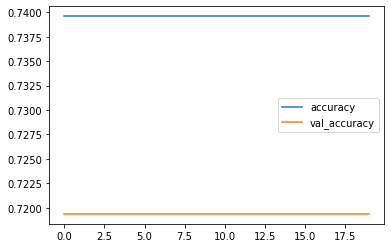

In [ ]:
# Plot between Accuracy and val_accuracy

history_model_seq_1[['accuracy','val_accuracy']].plot()

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq = model.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq

97/97 [==============================] - 2s 15ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# calssification report

print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       809
           1       0.74      1.00      0.85      2264

    accuracy                           0.74      3073
   macro avg       0.37      0.50      0.42      3073
weighted avg       0.54      0.74      0.63      3073



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Model overfit.
- Nilai akurasi model adalah 74%.
- Grafik loss terlihat baik karena terjadi penuruan loss, namun grafik val loss terlihat buruk karena terjadi kenaikan loss.
- Grafik akurasi dan val akurasi sama-sama buruk karena hanya membentuk garis mendatar tanpa adanya kenaikan garis.
- Model Sequential Baseline ini hanya memiliki 1 input, 1 hidden layer dan 1 output.

# Sequential API Model using Improvement

# 6.2 - Model Definition

In [ ]:
# create Early Stopping

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss', patience=30, verbose=0,
    mode='max', restore_best_weights=True
)

In [ ]:
#create Sequential API
model_3 = Sequential()
model_3.add(text_vectorization)
model_3.add(embedding)
model_3.add(GlobalAveragePooling1D())

#hidden layer 1
model_3.add(Dense(32,activation='relu')) 

# drop out
model_3.add(Dropout(0.2))

#hidden layer 2
model_3.add(Dense(18,activation='relu')) 

#drop out layer
model_3.add(Dropout(0.2)) 

#output layer
model_3.add(Dense(1,activation='sigmoid')) 

#compiling
model_3.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics='accuracy' )

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1510)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1510, 128)         5343488   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 18)               

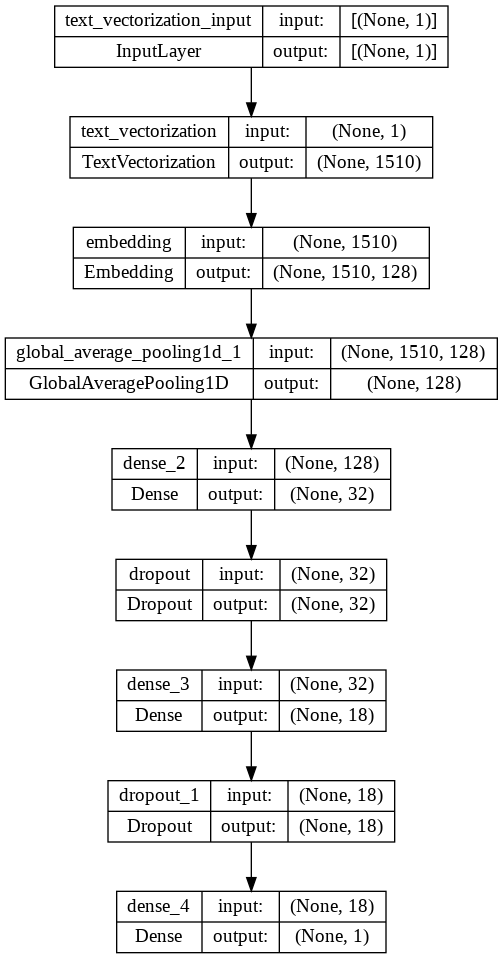

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_3, show_shapes=True)

# 7.2 - Model Training

In [ ]:
# Train the Model
model_seq_2 = model_3.fit(train_dataset,
                         epochs=10,
                        callbacks=[early_stopping],
                         validation_data = val_dataset)

Epoch 1/10
232/232 [==============================] - 21s 88ms/step - loss: 0.4911 - accuracy: 0.7689 - val_loss: 0.3732 - val_accuracy: 0.8518
Epoch 2/10
232/232 [==============================] - 20s 86ms/step - loss: 0.2838 - accuracy: 0.8950 - val_loss: 0.3664 - val_accuracy: 0.8564
Epoch 3/10
232/232 [==============================] - 17s 74ms/step - loss: 0.2355 - accuracy: 0.9138 - val_loss: 0.2853 - val_accuracy: 0.8878
Epoch 4/10
232/232 [==============================] - 19s 84ms/step - loss: 0.2210 - accuracy: 0.9194 - val_loss: 0.3193 - val_accuracy: 0.8848
Epoch 5/10
232/232 [==============================] - 19s 81ms/step - loss: 0.2141 - accuracy: 0.9215 - val_loss: 0.3379 - val_accuracy: 0.8806
Epoch 6/10
232/232 [==============================] - 19s 84ms/step - loss: 0.2055 - accuracy: 0.9236 - val_loss: 0.3222 - val_accuracy: 0.8871
Epoch 7/10
232/232 [==============================] - 17s 75ms/step - loss: 0.2001 - accuracy: 0.9274 - val_loss: 0.2731 - val_accuracy:

# 8.2 - Model Evaluation

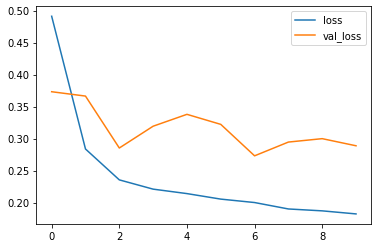

In [ ]:
# Plot between loss and val_loss

model_imp_df = pd.DataFrame(model_seq_2.history)
model_imp_df[['loss', 'val_loss']].plot()

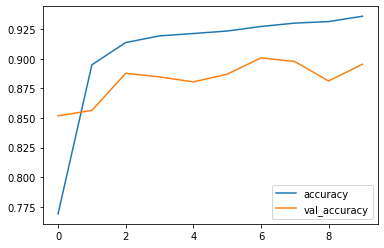

In [ ]:
# Plot between Accuracy and val_accuracy

model_imp_df[['accuracy','val_accuracy']].plot()

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq_imp = model_3.predict(X_test)
y_pred_seq_imp = np.where(y_pred_seq_imp >= 0.5, 1, 0)
y_pred_seq_imp

97/97 [==============================] - 2s 15ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
# calssification report

print(classification_report(y_test, y_pred_seq_imp))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       809
           1       0.94      0.91      0.92      2264

    accuracy                           0.89      3073
   macro avg       0.85      0.87      0.86      3073
weighted avg       0.90      0.89      0.89      3073



- Model Overfit
- Nilai akurasi model 89%
- Grafik loss pada data train terlihat baik, karena terjadi penuruan loss. Grafik val loss exploding namun terlihat terdapat penurunan loss.
- Grafik akurasi terlihat baik karena terjadi peningkatan nilai akurasi. Grafik val akurasi exploding, namun terlihat terdapat peningkatan akurasi.
- Model Sequential API dengan improvement menambahkan callback Earlystopping, drop out dan menambahkan jumlah hidden layer mendapatkan hasil akurasi yang lebih baik daripada Baseline Model Sequential API.

# LSTM Model

# 6.3 - Model Definition

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss', patience=30, verbose=0,
    mode='max', restore_best_weights=True
)

In [ ]:
from tensorflow.python.data.ops.options import model_pb2
# Model Training dengan Menggunakan LSTM

model_2 = Sequential()
model_2.add(text_vectorization)
model_2.add(embedding)
model_2.add(LSTM(32, return_sequences=True)) #hidden layer1
model_2.add(Dropout(0.2))
model_2.add(LSTM(32)) #hidden layer2
model_2.add(Dropout(0.2)) #add drop out
model_2.add(Dense(1,activation='softmax'))

model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
# Model Summary
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1510)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1510, 128)         5343488   
                                                                 
 lstm (LSTM)                 (None, 1510, 32)          20608     
                                                                 
 dropout_2 (Dropout)         (None, 1510, 32)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                      

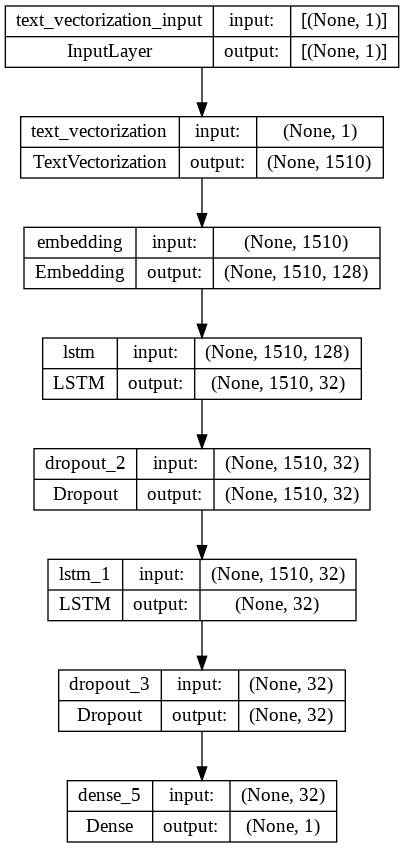

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_2, show_shapes=True)

# 7.3 - Model Training

In [ ]:
model_lstm_hist = model_2.fit(train_dataset, epochs=10,
                         callbacks=[early_stopping],
                         validation_data=val_dataset)

Epoch 1/10
232/232 [==============================] - 465s 2s/step - loss: 0.5752 - accuracy: 0.7396 - val_loss: 0.5946 - val_accuracy: 0.7194
Epoch 2/10
232/232 [==============================] - 469s 2s/step - loss: 0.5755 - accuracy: 0.7396 - val_loss: 0.5951 - val_accuracy: 0.7194
Epoch 3/10
232/232 [==============================] - 459s 2s/step - loss: 0.5750 - accuracy: 0.7396 - val_loss: 0.5949 - val_accuracy: 0.7194
Epoch 4/10
232/232 [==============================] - 472s 2s/step - loss: 0.5757 - accuracy: 0.7396 - val_loss: 0.5944 - val_accuracy: 0.7194
Epoch 5/10
232/232 [==============================] - 464s 2s/step - loss: 0.5749 - accuracy: 0.7396 - val_loss: 0.5945 - val_accuracy: 0.7194
Epoch 6/10
232/232 [==============================] - 455s 2s/step - loss: 0.5747 - accuracy: 0.7396 - val_loss: 0.5947 - val_accuracy: 0.7194
Epoch 7/10
232/232 [==============================] - 446s 2s/step - loss: 0.5746 - accuracy: 0.7396 - val_loss: 0.5945 - val_accuracy: 0.7194

# 8.3 - Model Evaluation

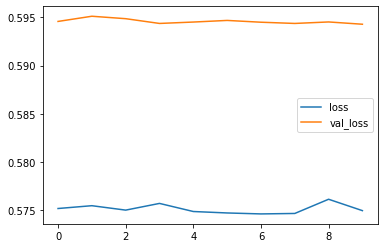

In [ ]:
# Plot between loss and val_loss

model_lstm_hist_df = pd.DataFrame(model_lstm_hist.history)
model_lstm_hist_df[['loss', 'val_loss']].plot()

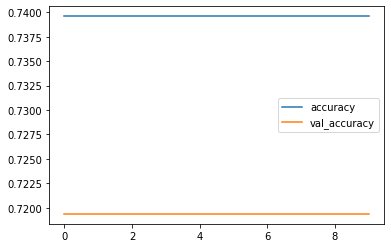

In [ ]:
# Plot between Accuracy and val_accuracy

model_lstm_hist_df[['accuracy','val_accuracy']].plot()

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq2 = model_2.predict(X_test)
y_pred_seq2 = np.where(y_pred_seq2 >= 0.5, 1, 0)
y_pred_seq2

97/97 [==============================] - 47s 467ms/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# calssification report

print(classification_report(y_test, y_pred_seq2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       809
           1       0.74      1.00      0.85      2264

    accuracy                           0.74      3073
   macro avg       0.37      0.50      0.42      3073
weighted avg       0.54      0.74      0.63      3073



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Model overfit.
- Nilai akurasi model adalah 74%.
- Grafik loss dan val loss sama-sama buruk karena tidak mengarah ke bawah, namun hanya berupa garis mendatar.
- Grafik akurasi dan val akurasi juga buruk karena tidak mengarah ke atas, hanya berupa garis mendatar.
- LSTM model tidak cocok untuk dataset ini, meskipun sudah ditambahkan EarlyStopping, dropout dan 2 hidden layer, tidak mendapatkan hasil yang baik.


# GRU Model

# 6.4 - Model Definition

In [ ]:
# Model Definition using GRU

model_GRU = Sequential()
model_GRU.add(text_vectorization)
model_GRU.add(embedding)
model_GRU.add(GRU(32, return_sequences=True))
model_GRU.add(GRU(32))
model_GRU.add(Dense(1,activation='sigmoid'))

model_GRU.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
model_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1510)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1510, 128)         5343488   
                                                                 
 gru (GRU)                   (None, 1510, 32)          15552     
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,365,409
Trainable params: 5,365,409
Non-trainable params: 0
____________________________________________

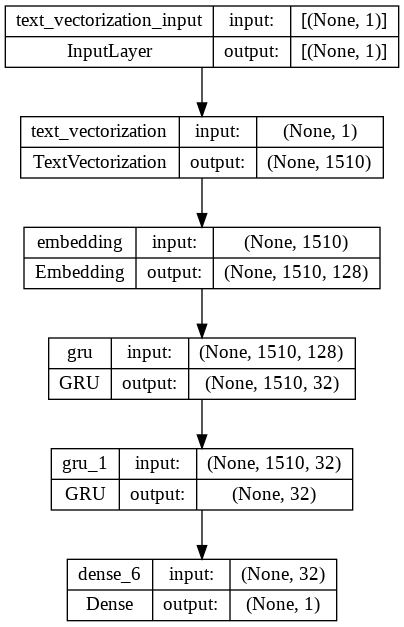

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_GRU, show_shapes=True)

# 7.4 - Model Training

In [ ]:
model_seq_GRU = model_GRU.fit(train_dataset,
                         epochs=10,
                         #callbacks=[early_stopping],
                         validation_data=val_dataset)

Epoch 1/10
232/232 [==============================] - 537s 2s/step - loss: 0.5746 - accuracy: 0.7396 - val_loss: 0.5985 - val_accuracy: 0.7194
Epoch 2/10
232/232 [==============================] - 454s 2s/step - loss: 0.5751 - accuracy: 0.7396 - val_loss: 0.5961 - val_accuracy: 0.7194
Epoch 3/10
232/232 [==============================] - 485s 2s/step - loss: 0.5747 - accuracy: 0.7396 - val_loss: 0.5974 - val_accuracy: 0.7194
Epoch 4/10
232/232 [==============================] - 483s 2s/step - loss: 0.5745 - accuracy: 0.7396 - val_loss: 0.5979 - val_accuracy: 0.7194
Epoch 5/10
232/232 [==============================] - 465s 2s/step - loss: 0.5744 - accuracy: 0.7396 - val_loss: 0.5973 - val_accuracy: 0.7194
Epoch 6/10
232/232 [==============================] - 466s 2s/step - loss: 0.5747 - accuracy: 0.7396 - val_loss: 0.5956 - val_accuracy: 0.7194
Epoch 7/10
232/232 [==============================] - 468s 2s/step - loss: 0.5747 - accuracy: 0.7396 - val_loss: 0.5962 - val_accuracy: 0.7194

# 8.4 - Model Evaluation

In [ ]:
# Plot between loss and val_loss

model_GRU_df = pd.DataFrame(model_seq_GRU.history)
model_GRU_df[['loss', 'val_loss']].plot()

In [ ]:
# Plot between Accuracy and val_accuracy

model_GRU_df[['accuracy','val_accuracy']].plot()

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq3 = model_GRU.predict(X_test)
y_pred_seq3 = np.where(y_pred_seq3 >= 0.5, 1, 0)
y_pred_seq3

In [ ]:
# calssification report

print(classification_report(y_test, y_pred_seq3))

- Model overfit
- Nilai akurasi skor GRU Model adalah 74%
- Grafik loss dan val loss buruk karena sama-sama membentuk garis lurus dan tidak mengarah ke bawah.
- Grafik akurasi dan val akurasi juga buruk karena sama-sama membentuk garis lurus dan tidak mengarah ke atas.
- Model GRU tidak cocok untuk dataset ini, karena hasil yang didapatkan tidak jauh berbeda dengan Model LSTM.

# 9 - Model Saving
> Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [ ]:
# Freeze Best Model

model_3.trainable = False

In [ ]:
# Best Model Summary

model_3.summary()

In [ ]:
model_3.save("Sentiment_Analysis_TripAdvisor")

In [ ]:
! zip -r Sentiment_Analysis_TripAdvisor.zip Sentiment_Analysis_TripAdvisor

# 10 - Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [ ]:
# Display Inference-Set 

data_inf

,Review,Rating,Sentiment
0,"not family friendly hotel, travelled wife 2 yr...",1,0
1,"did n't know expect honemoon surprise loved, r...",4,1
2,"enthusiastically reccomend majestic colonial, ...",5,1
3,"problems start beware hotel, choices resort pu...",1,0
4,enjoyed second stay husband just returned seco...,5,1
5,wonderful hotel trip stayed hotel europa just ...,5,1
6,"fantastic resort want party loaded pick nuts, ...",4,1
7,great location clean comfortable stayed july 0...,4,1
8,"loved did n't use bug spray, loved resort, sui...",4,1
9,"central hotel central, reception desk helpful,...",2,0


In [ ]:
# A Function to use in the dataframe

def text_process(text):

  # 1. Change all text to Lowercase
  text = text.lower()
  
  # 2. Removing Mentions
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # 3. Removing Hashtags
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # 4. Removing \n
  text = re.sub(r"\\n", " ",text)
  
  # 5. Removing Whitespaces
  text = text.strip()

  # 6. Removing Links
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # 7. Removing non text characters such as Emojis, Mathematical symbols
  text = re.sub("[^A-Za-z\s']", " ", text)

  # 8. Removing RT
  text = re.sub("rt", " ",text)

  # 9. Tokenization
  tokens = word_tokenize(text)

  # 10. Removing Stopwords
  stopwords_en = list(set(stopwords.words('english')))
  text = ' '.join([word for word in tokens if word not in stopwords_en])
  
  # 11. Stemming
  stemmer = PorterStemmer()
  text = stemmer.stem(text)
  
  return text

In [ ]:
# Applying Preprocessing to all Documents

data_inf['Review_processed'] = data_inf['Review'].apply(lambda x: text_process(x))
data_inf

,Review,Rating,Sentiment,Review_processed
0,"not family friendly hotel, travelled wife 2 yr...",1,0,family friendly hotel travelled wife yr old bo...
1,"did n't know expect honemoon surprise loved, r...",4,1,n't know expect honemoon surprise loved room c...
2,"enthusiastically reccomend majestic colonial, ...",5,1,enthusiastically reccomend majestic colonial m...
3,"problems start beware hotel, choices resort pu...",1,0,problems sta beware hotel choices reso punta c...
4,enjoyed second stay husband just returned seco...,5,1,enjoyed second stay husband returned second tr...
5,wonderful hotel trip stayed hotel europa just ...,5,1,wonderful hotel trip stayed hotel europa coupl...
6,"fantastic resort want party loaded pick nuts, ...",4,1,fantastic reso want pa loaded pick nuts relaxi...
7,great location clean comfortable stayed july 0...,4,1,great location clean comfo able stayed july ho...
8,"loved did n't use bug spray, loved resort, sui...",4,1,loved n't use bug spray loved reso suite lovel...
9,"central hotel central, reception desk helpful,...",2,0,central hotel central reception desk helpful g...


In [ ]:
data_inf_final = data_inf['Review_processed']

In [ ]:
# Predict using Best Model & Change if >= 0.5 to 1

y_pred_inf = model_3.predict(data_inf_final)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

In [ ]:
# Create DataFrame of Label Prediction using Best Model

y_pred_inf_data = pd.DataFrame(y_pred_inf, columns=['Sentiment_Prediction'])
y_pred_inf_data

,Sentiment_Prediction
0,0
1,1
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [ ]:
# Concate between Inference-Set and Label's Prediction Best Model

data_inf = pd.concat([data_inf, y_pred_inf_data], axis=1)
data_inf

,Review,Rating,Sentiment,Review_processed,Sentiment_Prediction
0,"not family friendly hotel, travelled wife 2 yr...",1,0,family friendly hotel travelled wife yr old bo...,0
1,"did n't know expect honemoon surprise loved, r...",4,1,n't know expect honemoon surprise loved room c...,1
2,"enthusiastically reccomend majestic colonial, ...",5,1,enthusiastically reccomend majestic colonial m...,1
3,"problems start beware hotel, choices resort pu...",1,0,problems sta beware hotel choices reso punta c...,0
4,enjoyed second stay husband just returned seco...,5,1,enjoyed second stay husband returned second tr...,1
5,wonderful hotel trip stayed hotel europa just ...,5,1,wonderful hotel trip stayed hotel europa coupl...,1
6,"fantastic resort want party loaded pick nuts, ...",4,1,fantastic reso want pa loaded pick nuts relaxi...,0
7,great location clean comfortable stayed july 0...,4,1,great location clean comfo able stayed july ho...,1
8,"loved did n't use bug spray, loved resort, sui...",4,1,loved n't use bug spray loved reso suite lovel...,1
9,"central hotel central, reception desk helpful,...",2,0,central hotel central reception desk helpful g...,0


Terdapat **9** hasil prediksi **benar** dan **1** hasil prediksi **salah**.

# 11 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

- Model terbaik yang didapatkan adalah **Model Sequential API using Improvement**
- Nilai accuracy masing - masing model adalah: 
  - Sequential API Baseline 74%
  - **Sequential API using Improvement 89%**
  - LSTM Model 74%
  - GRU Model 74%
- Model Sequential API dengan Improvement yaitu menambahkan callback Earlystopping, drop out dan menambahkan jumlah hidden layer mendapatkan hasil akurasi yang lebih baik daripada Baseline Model Sequential API.
- Hasil prediksi pada Data Inference menunjukkan bahwa **9 data** terprediksi **benar** dan **1 data** terprediksi **salah**.
- 18 kata yang sering muncul pada Review Hotel by TripAdvisor adalah : 'hotel', 'room', 'great',' nt', 'good', 'staff', 'stay', 'nice', 'rooms', 'location', 'stayed', 'night', 'service', 'beach', 'day', 'time', 'clean', 'breakfast
- Kata yang sering muncul pada review postive adalah room, hotel, resort, nice, good, day, time, great, loved best, wonderful.
- Kata yang sering muncul pada review negative adalah room, hotel, n't, day, night, stay, problem, time, small, food, got, place, need, bad, away.
- Pengunjung lebih banyak memberikan sentiment Positive sebanyak 73.66% dibandingkan sentimen Negative sebanyak 26.34%.
- Rating terbanyak yang diberikan pengunjung adalah 5 yaitu sebanyak 9.054 review dan Rating 4 sebanyak 6.039 review

Saran untuk model:
- Klasifikasi pada sentiment Negative kurang terepresantikan dengan baik, karena data Imbalance. Balancing data mungkin dapat dilakukan untuk memberikan hasil yang lebih baik.
- Teks analisis dan cleaning data pada informasi yang kurang penting secara lebih lanjut, mungkin dapat memberikan hasil model yang lebih baik.
